In [28]:
import numpy as np
import pandas as pd
from pprint import pprint
from os import listdir
from os.path import isfile, join
from sklearn.model_selection import StratifiedKFold
from scipy import stats
import numpy as np
from sklearn import linear_model, svm
import re
from sklearn.metrics import roc_curve, auc,f1_score


n_features = [100,1000,10000,20000,3000,30000,4000,500,5000,6000,7000,8000,9000]
#n_features = [100,1000]

n_features.sort()
s = "../braindata/data_2_conn_select_100.csv"
lr_all_feature=[]
svm_all_feature=[]
lr_fls_feature=[]
svm_fls_feature=[]

for i in n_features:
    lr_all_accs = []
    lr_all_scores = []
    lr_f1s = []
    svm_all_accs = []
    svm_all_scores = []
    svm_f1s = []
    base_labels = []
    #lr_accuracies = []
    #svm_accuracies = []
    
    replaced = re.sub('100', str(i), s)
    print(replaced)
    dd =pd.read_csv(replaced,header=0)
    data=np.array(dd)
        #print(data.shape)
    idx_IN_columns = np.append(np.array([3,4]),np.array(range(11,data.shape[1])))
    features=data[:,idx_IN_columns]
        #features=data[:,11:data.shape[1]]
        #features = features.transpose()
    features = stats.zscore(features)
        #print(features.shape)
    y=data[:,6]
        #print(y)
    print(y.shape)
        #5: ad-smi / 6:mci-smi / 7:adonly-smi / 8:ad-mci / 9:adonly-mci / 10:adonly - adwithsmallvv

    ind_num=np.isnan(y)
       # print(ind_num.shape)
    y_no_nan = y[~ind_num]
    features_no_nan = features[~ind_num,:]

       # print(y.shape)

    y=y_no_nan
    features=features_no_nan
    
    for runs in range(10):
        lr_accuracies = []
        lr_scores = []
        svm_accuracies = []
        svm_scores = []
        strat_labels = []

        logistic = linear_model.LogisticRegression(C=1e5)
        rbf = svm.SVC(C=10,kernel='linear',gamma=0.01)
       
        skf = StratifiedKFold(n_splits=10)
    for train_index, test_index in skf.split(features, y):
                train_data, test_data = features[train_index], features[test_index]
                train_labels, test_labels = y[train_index], y[test_index]

                strat_labels = np.append(strat_labels, test_labels)

                log = logistic.fit(train_data, train_labels)
                log_prob = log.decision_function(test_data)
                log_acc = log.score(test_data, test_labels)

                #f1 calculation
                y_pred = logistic.predict(test_data)
                log_f1 = f1_score(test_labels, y_pred)

                lr_accuracies = np.append(lr_accuracies, log_acc)
                lr_scores = np.append(lr_scores, log_prob)
                lr_f1s = np.append(lr_f1s, log_f1)
                #print('Logistic Regression Accuracy: %f' % log_acc)

                rbf = rbf.fit(train_data, train_labels)
                svm_acc = rbf.score(test_data, test_labels)
                svm_prob = rbf.decision_function(test_data)

                #f1 calculation
                y_pred = rbf.predict(test_data)
                svm_f1 = f1_score(test_labels, y_pred)
                #print('SVM Accuracy: %f' % svm_acc)
                svm_accuracies = np.append(svm_accuracies, svm_acc)
                svm_scores = np.append(svm_scores, svm_prob)
                svm_f1s = np.append(svm_f1s, svm_f1)

                base_labels = np.append(base_labels, strat_labels)
                lr_all_scores = np.append(lr_all_scores, lr_scores)
                lr_fold_avg = np.mean(lr_accuracies)
                lr_all_accs = np.append(lr_all_accs, lr_fold_avg)
                svm_all_scores = np.append(svm_all_scores, svm_scores)
                svm_fold_avg = np.mean(svm_accuracies)
                svm_all_accs = np.append(svm_all_accs, svm_fold_avg)
                #print('Logistic Regression Accuracy: %f' % log_acc_avg)
                #print('SVM Regression Accuracy: %f' % svm_acc_avg)
    print(max(lr_all_accs))
    print(max(svm_all_accs))
    
    lr_all_feature=np.append(lr_all_feature,np.mean(lr_all_accs))
    svm_all_feature=np.append(svm_all_feature,np.mean(svm_all_accs))
    lr_fls_feature=np.append(lr_fls_feature,np.mean(lr_f1s))
    svm_fls_feature=np.append(svm_fls_feature,np.mean(svm_f1s))

../braindata/data_2_conn_select_100.csv
(211,)
0.818181818182
0.909090909091
../braindata/data_2_conn_select_500.csv
(211,)


/Users/yunwang/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.818181818182
0.909090909091
../braindata/data_2_conn_select_1000.csv
(211,)
0.772727272727
0.95974025974
../braindata/data_2_conn_select_3000.csv
(211,)
0.8
0.954545454545
../braindata/data_2_conn_select_4000.csv
(211,)
0.814285714286
0.954545454545
../braindata/data_2_conn_select_5000.csv
(211,)
0.818181818182
0.954545454545
../braindata/data_2_conn_select_6000.csv
(211,)
0.827272727273
0.954545454545
../braindata/data_2_conn_select_7000.csv
(211,)
0.788311688312
0.954545454545
../braindata/data_2_conn_select_8000.csv
(211,)
0.801298701299
0.954545454545
../braindata/data_2_conn_select_9000.csv
(211,)
0.788311688312
0.954545454545
../braindata/data_2_conn_select_10000.csv
(211,)
0.775324675325
1.0
../braindata/data_2_conn_select_20000.csv
(211,)
0.774494949495
0.954545454545
../braindata/data_2_conn_select_30000.csv
(211,)
0.775324675325
1.0


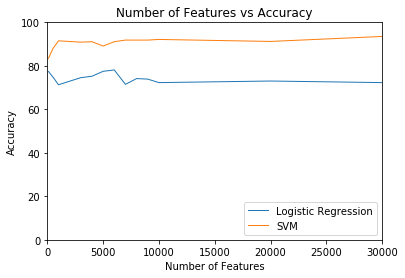

In [35]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(n_features, lr_all_feature*100, lw=1, label='Logistic Regression')
plt.plot(n_features, svm_all_feature*100, lw=1, label='SVM')
plt.xlim([0, 30000])
plt.ylim([0, 100])
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Number of Features vs Accuracy')
plt.legend(loc="lower right")
plt.savefig('AD_SMI_Conn_Only.eps')
plt.show()

In [30]:
svm_f1s=svm_f1s[np.nonzero(svm_f1s)]
print(svm_f1s)

print("LR accuracy Avg: {}".format(np.mean(lr_all_feature)))
print("LR accuracy Standard Deviation: {}".format(np.std(lr_all_feature)))

print("LR f1s Avg : {}".format(np.mean( lr_fls_feature)))
print("LR f1s Standard Deviation: {}".format(np.std(lr_f1s)))

print("SVM Avg: {}".format(np.mean(svm_all_feature)))
print("SVM Standard Deviation: {}".format(np.std(svm_all_accs)))

print("SVM f1s Avg : {}".format(np.mean( svm_fls_feature )))
print("SVM f1s Standard Deviation: {}".format(np.std(svm_fls_feature)))
#print(lr_all_accs)

[ 1.          1.          0.93333333  0.93333333  0.92307692  0.92307692
  1.          0.8         0.28571429]
LR accuracy Avg: 0.7431806095139427
LR accuracy Standard Deviation: 0.02190947753858812
LR f1s Avg : 0.6392656488810335
LR f1s Standard Deviation: 0.32350752173752156
SVM Avg: 0.9057388074888075
SVM Standard Deviation: 0.05566067926261496
SVM f1s Avg : 0.7682222051452823
SVM f1s Standard Deviation: 0.014861269273292543


In [12]:
lr_all_accs

array([ 0.63636364,  0.72727273,  0.6969697 ,  0.72727273,  0.72181818,
        0.75151515,  0.77272727,  0.74558081,  0.69977553,  0.6520202 ])

In [16]:
lr_all_accs

array([ 0.63636364,  0.72727273,  0.6969697 ,  0.72727273,  0.72181818,
        0.75151515,  0.77272727,  0.74558081,  0.69977553,  0.6520202 ])

In [23]:
 svm_all_feature

array([ 0.83406285,  0.91513592])